In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

# 预设
d1=0.2
d2=0.4
d3=0.6
n_clusters=4

def split_df(df):
    # Assuming you have a DataFrame 'df' with an index column
    # Create an empty list to store the resulting DataFrames
    df_list = []

    # Initialize variables to track the start and end indices
    start_idx = None

    # Iterate through the DataFrame to split it
    for idx, row in df.iterrows():
        if row['序号'] == 1:  # Replace 'index_column' with the actual name of your index column
            if start_idx is not None:
                # If start_idx is not None, it means we've found a new "1", so we should create a new DataFrame
                end_idx = idx
                df_split = df.iloc[start_idx:end_idx]
                df_list.append(df_split)
            start_idx = idx

    # Handle the last portion of the DataFrame
    if start_idx is not None:
        df_split = df.iloc[start_idx:]
        df_list.append(df_split)

    # Now df_list contains a list of DataFrames split at each occurrence of "1" in the index
    return df_list

def give_clusters(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    data = df.values.reshape(-1, 1)
    cluster_labels = kmeans.fit_predict(data)
    
    # Calculate the mean values for each cluster
    cluster_means = []
    for cluster in range(n_clusters):
        cluster_data = df[cluster_labels == cluster]
        cluster_mean = cluster_data.mean()
        cluster_means.append((cluster, cluster_mean))
    
    # Sort clusters by mean value in descending order
    sorted_clusters = sorted(cluster_means, key=lambda x: x[1], reverse=True)
    
    # Create a dictionary to map cluster indices to their ranks
    cluster_ranks = {cluster[0]: rank + 1 for rank, cluster in enumerate(sorted_clusters)}
    
    # Get the ranks for each data point and return as a list
    cluster_indices = [cluster_ranks[label] for label in cluster_labels]
    
    return cluster_indices

def data_processing_naive_main(df):
    df = df.round(1)
    # 计算总换算分
    rank_list=df['思想成长类成绩单积分'].rank(method='dense', ascending=False).astype(int)
    for i, row in df.iterrows():
        df.at[i, '换算分'] = 30 if rank_list[i] <= math.ceil(len(
            df)*d1) else (28 if rank_list[i] <= math.ceil(len(df)*d2) else (26 if rank_list[i] <= math.ceil(len(df)*d3) else 24))
    rank_list=df['创新创业类总积分'].rank(method='dense', ascending=False).astype(int)
    for i, row in df.iterrows():
        df.at[i, '换算分.1'] = 30 if rank_list[i] <= math.ceil(len(
            df)*d1) else (28 if rank_list[i] <= math.ceil(len(df)*d2) else (26 if rank_list[i] <= math.ceil(len(df)*d3) else 24))
    rank_list=df['文体活动类总积分'].rank(method='dense', ascending=False).astype(int)
    for i, row in df.iterrows():
        df.at[i, '换算分.2'] = 20 if rank_list[i] <= math.ceil(len(
            df)*d1) else (18 if rank_list[i] <= math.ceil(len(df)*d2) else (16 if rank_list[i] <= math.ceil(len(df)*d3) else 14))
    rank_list=df['志愿公益、生产劳动类总积分'].rank(method='dense', ascending=False).astype(int)
    for i, row in df.iterrows():
        df.at[i, '换算分.3'] = 20 if rank_list[i] <= math.ceil(len(
            df)*d1) else (18 if rank_list[i] <= math.ceil(len(df)*d2) else (16 if rank_list[i] <= math.ceil(len(df)*d3) else 14))
    df['总换算分'] = df['换算分'] + df['换算分.1'] + df['换算分.2'] + df['换算分.3']
    # df = df.sort_values(by='总换算分', ascending=False)
    # df['序号'] = range(1, len(df)+1)
    return df

def data_processing_clusters_main(df):
    df = df.round(1)
    # 计算总换算分
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters_list=give_clusters(df['思想成长类成绩单积分'],n_clusters)
    for i, row in df.iterrows():
        df.at[i, '换算分'] = 30 if clusters_list[i] <= math.ceil(n_clusters*d1) else (28 if clusters_list[i] <= math.ceil(n_clusters*d2) else (26 if clusters_list[i] <= math.ceil(n_clusters*d3) else 24))
    clusters_list=give_clusters(df['创新创业类总积分'],n_clusters)
    for i, row in df.iterrows():
        df.at[i, '换算分.1'] = 30 if clusters_list[i] <= math.ceil(n_clusters*d1) else (28 if clusters_list[i] <= math.ceil(n_clusters*d2) else (26 if clusters_list[i] <= math.ceil(n_clusters*d3) else 24))
    clusters_list=give_clusters(df['文体活动类总积分'],n_clusters)
    for i, row in df.iterrows():
        df.at[i, '换算分.2'] = 20 if clusters_list[i] <= math.ceil(n_clusters*d1) else (18 if clusters_list[i] <= math.ceil(n_clusters*d2) else (16 if clusters_list[i] <= math.ceil(n_clusters*d3) else 14))
    clusters_list=give_clusters(df['志愿公益、生产劳动类总积分'],n_clusters)
    for i, row in df.iterrows():
        df.at[i, '换算分.3'] = 20 if clusters_list[i] <= math.ceil(n_clusters*d1) else (18 if clusters_list[i] <= math.ceil(n_clusters*d2) else (16 if clusters_list[i] <= math.ceil(n_clusters*d3) else 14))
    df['总换算分'] = df['换算分'] + df['换算分.1'] + df['换算分.2'] + df['换算分.3']
    # df = df.sort_values(by='总换算分', ascending=False)
    # df['序号'] = range(1, len(df)+1)
    return df

def data_processing_naive(input, output):
    # 读取xlsx文件
    df = pd.read_excel(input, header=3)
    
    # print(input)
    # print(df.columns.tolist())
    df.rename(columns={'Unnamed: 0': '序号'}, inplace=True)
    df.rename(columns={'Unnamed: 1': '姓名'}, inplace=True)
    df.rename(columns={'Unnamed: 16': '总换算分'}, inplace=True)
    df.rename(columns={'Unnamed: 17': '本人签字确认'}, inplace=True)

    # 数据预处理
    df['总换算分'] = 0
    df['换算分'] = 0
    df['换算分.1'] = 0
    df['换算分.2'] = 0
    df['换算分.3'] = 0
    
    # main
    df = data_processing_naive_main(df)
    
    # 保存表格
    df.to_excel('naive_d1_'+str(d1)+'_d2_'+str(d2)+'_d3_'+str(d3)+'_'+output, index=False)

def data_processing_clusters(input, output):
    # 读取xlsx文件
    df = pd.read_excel(input, header=3)

    # print(input)
    # print(df.columns.tolist())
    df.rename(columns={'Unnamed: 0': '序号'}, inplace=True)
    df.rename(columns={'Unnamed: 1': '姓名'}, inplace=True)
    df.rename(columns={'Unnamed: 16': '总换算分'}, inplace=True)
    df.rename(columns={'Unnamed: 17': '本人签字确认'}, inplace=True)

    # 数据预处理
    df['总换算分'] = 0
    df['换算分'] = 0
    df['换算分.1'] = 0
    df['换算分.2'] = 0
    df['换算分.3'] = 0
    
    # main
    df = data_processing_clusters_main(df)
    # 保存表格
    df.to_excel('clusters_d1_'+str(d1)+'_d2_'+str(d2)+'_d3_'+str(d3)+'_'+output, index=False)
    
def data_processing_naive_all(xlsx_file_names):
    df_all=[]
    for i in xlsx_file_names:
        df = pd.read_excel(i, header=3)
        print(i) # debug
        print(df.columns.tolist())
        df.rename(columns={'Unnamed: 0': '序号'}, inplace=True)
        df.rename(columns={'Unnamed: 1': '姓名'}, inplace=True)
        df['序号'] = range(1, len(df)+1)
        df_all.append(data_processing_naive_main(df))
        print(df.columns.tolist())
    merged_df = pd.concat(df_all, axis=0, ignore_index=True)
    merged_df.rename(columns={'Unnamed: 16': '旧总换算分'}, inplace=True)
    merged_df.drop('Unnamed: 17', axis=1, inplace=True)
    return data_processing_naive_main(merged_df)        

def data_processing_clusters_all(xlsx_file_names):
    df_all=[]
    for i in xlsx_file_names:
        df = pd.read_excel(i, header=3)
        df.rename(columns={'Unnamed: 0': '序号'}, inplace=True)
        df.rename(columns={'Unnamed: 1': '姓名'}, inplace=True)
        df['序号'] = range(1, len(df)+1)
        df_all.append(data_processing_clusters_main(df))
    merged_df = pd.concat(df_all, axis=0, ignore_index=True)
    merged_df.rename(columns={'Unnamed: 16': '旧总换算分'}, inplace=True)
    merged_df.drop('Unnamed: 17', axis=1, inplace=True)
    return data_processing_clusters_main(merged_df)      
    

In [34]:
# 指定目录路径
path = '/home/zhangxin/data_processing_for_school/2022级_new'
# 获取目录下所有文件名
file_names = os.listdir(path)

# 筛选出所有以".xls"结尾、包含"2021级"且不包含"processed_"的文件名
# xlsx_file_names = [file_name for file_name in file_names if file_name.endswith(
#     '.xls') and '2021级' in file_name and 'processed_' not in file_name]

# 筛选出所有以".xlsx"结尾、包含"2022级"且不包含"processed_"的文件名
xlsx_file_names = [file_name for file_name in file_names if file_name.endswith(
    '.xlsx') and '2022级' in file_name and 'processed_' not in file_name]

%cd {path}

# 打印所有.xlsx文件名
print(xlsx_file_names)


/home/zhangxin/data_processing_for_school/2022级_new
['2022级核工程与核技术班.xlsx', '2022级核物二班.xlsx', '2022级放化二班.xlsx', '2022级核物一班.xlsx', '2022级辐射防护与核安全班2.xlsx', '2022级核化工与核燃料工程班.xlsx', '2022级放化一班.xlsx']


In [35]:
# # do it
# for i in xlsx_file_names:
#     # i='2022级放化一班.xlsx'
#     data_processing_naive(i, 'processed_'+i)
# # ['序号', '姓名', '思想成长类成绩单积分', '换算分', '创新创业类成绩单积分', '创新创业类补录积分', '创新创业类总积分', '换算分.1', '文体活动类成绩单积分', '文体活动类补录积分', '文体活动类总积分', '换算分.2', '志愿公益类', '生产劳动类成绩单积分', '志愿公益、生产劳动类总积分', '换算分.3', '总换算分', '本人签字确认']

In [36]:
tmp = data_processing_naive_all(xlsx_file_names)
tmp.to_excel("年级总表"+".xls", index=False)
df_list=split_df(tmp)
for i in range(len(xlsx_file_names)):
    print(df_list[i])
    df_list[i].to_excel('naive_all_d1_'+str(d1)+'_d2_'+str(d2)+'_d3_'+str(d3)+'_'+'processed_'+xlsx_file_names[i], index=False)

2022级核工程与核技术班.xlsx


KeyError: '志愿公益、生产劳动类总积分'

In [ ]:
# for i in range(10):
#     n_clusters=i+5
#     tmp= data_processing_clusters_all(xlsx_file_names)
#     tmp.to_excel("zxznb"+str(n_clusters)+".xls", index=False)

/opt/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Data  cluster
0     13        5
1     16        5
2     22        1
3      1        0
4      4        0
5     28        4
6      4        0
7      8        2
8     10        2
9     20        3
10    22        1
11    19        3
12     5        0
13    24        1
14     7        2
15    25        4
16    25        4
17    13        5
18    27        4
19     2        0
20     7        2
21     8        2
22    24        1
23    15        5
24    25        4
25    18        3
26     6        2
27    26        4
28    14        5
29     9        2


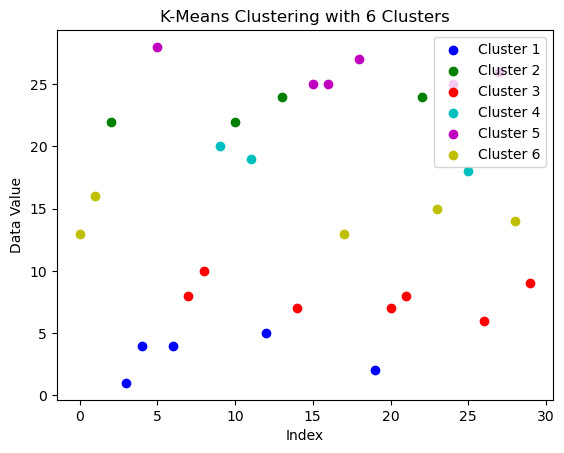

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 生成一维随机数据
np.random.seed(0)  # 以确保生成相同的随机数据
data = np.random.randint(1, 31, size=30)

# 转换为DataFrame
df = pd.DataFrame({'Data': data})

# 指定要分成的类数量
n_clusters = 6

# 初始化K均值聚类模型
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# 进行聚类
df['cluster'] = kmeans.fit_predict(df)

# 打印每个数据点所属的簇
print(df)

# 可视化聚类结果
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(n_clusters):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['Data'], c=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Index')
plt.ylabel('Data Value')
plt.legend()
plt.title(f'K-Means Clustering with {n_clusters} Clusters')
plt.show()

In [ ]:


# # 生成一维随机数据
# np.random.seed(0)  # 以确保生成相同的随机数据
# data = np.random.randint(1, 31, size=30)

# # 转换为DataFrame
# df = pd.DataFrame({'Data': data})

# # 指定要分成的类数量
# n_clusters = 5

# # 初始化K均值聚类模型
# kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# # 进行聚类
# df['cluster'] = kmeans.fit_predict(df)

# # 打印每个数据点所属的簇
# print(df)

# # 可视化聚类结果
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# for i in range(n_clusters):
#     cluster_data = df[df['cluster'] == i]
#     plt.scatter(cluster_data.index, cluster_data['Data'], c=colors[i], label=f'Cluster {i+1}')

# plt.xlabel('Index')
# plt.ylabel('Data Value')
# plt.legend()
# plt.title(f'K-Means Clustering with {n_clusters} Clusters')
# plt.show()


In [ ]:
import pandas as pd

# 创建一个示例DataFrame
data = {'ColumnA': [10, 20, 15, 25, 20]}
df = pd.DataFrame(data)
print(df)
# 获取某一列数据
column_name = 'ColumnA'
target_value = 15  # 要获取排名的值

# 计算排名
df['Rank'] = df[column_name].rank(ascending=False, method='min').astype(int)

# 获取目标值的排名
target_rank = df[df[column_name] == target_value]['Rank'].values[0]

# 打印排名
print(f'值 {target_value} 在列 {column_name} 中的排名是 {target_rank}')


   ColumnA
0       10
1       20
2       15
3       25
4       20
值 15 在列 ColumnA 中的排名是 4
